<a href="https://colab.research.google.com/github/opassos/blog/blob/master/_notebooks/2021-10-30-EDA_Satorius_Cell_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA da competição Sartorius Cell Instance Segmentation - Kaggle

> Tutorial de EDA para a competição [Kaggle](https://www.kaggle.com/c/sartorius-cell-instance-segmentation)

- toc: true
- comments: true
- categories: [Tutorial, EDA]
- image: images/sartorius_eda.png

## Setup

[Como usar a API do Kaggle no colab](https://colab.research.google.com/github/corrieann/kaggle/blob/master/kaggle_api_in_colab.ipynb#scrollTo=0HtGf0HEXEa5)

In [2]:
!pip install -Uqqq kaggle
!pip install -Uqqq fastai

In [4]:
from google.colab import files

uploaded = files.upload()
uploaded.keys()

!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [5]:
from kaggle.api.kaggle_api_extended import KaggleApi

api = KaggleApi()
api.authenticate()

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

## Baixando o dataset da competição

In [7]:
api.competition_download_files('sartorius-cell-instance-segmentation')

In [8]:
!unzip sartorius-cell-instance-segmentation.zip -d comp_data > /dev/null 2>&1

## Explorando o CSV

In [13]:
df = pd.read_csv('/content/comp_data/train.csv')
df.tail()

,id,annotation,width,height,cell_type,plate_time,sample_date,sample_id,elapsed_timedelta
73580,ffdb3cc02eef,3610 3 4311 7 5014 9 5717 11 6420 13 7123 15 7...,704,520,cort,11h59m00s,2020-11-01,cort[debris]_D9-3_Vessel-384_Ph_4,0 days 11:59:00
73581,ffdb3cc02eef,341585 2 342287 5 342988 10 343690 13 344394 1...,704,520,cort,11h59m00s,2020-11-01,cort[debris]_D9-3_Vessel-384_Ph_4,0 days 11:59:00
73582,ffdb3cc02eef,47788 3 48490 7 49192 11 49896 13 50599 14 513...,704,520,cort,11h59m00s,2020-11-01,cort[debris]_D9-3_Vessel-384_Ph_4,0 days 11:59:00
73583,ffdb3cc02eef,333290 1 333993 2 334696 4 335399 5 336102 6 3...,704,520,cort,11h59m00s,2020-11-01,cort[debris]_D9-3_Vessel-384_Ph_4,0 days 11:59:00
73584,ffdb3cc02eef,249775 2 250477 6 251180 8 251882 11 252585 12...,704,520,cort,11h59m00s,2020-11-01,cort[debris]_D9-3_Vessel-384_Ph_4,0 days 11:59:00


In [14]:
img_shape = (704, 520)

In [15]:
df = df[['id', 'annotation', 'cell_type']]
df.head()

,id,annotation,cell_type
0,0030fd0e6378,118145 6 118849 7 119553 8 120257 8 120961 9 1...,shsy5y
1,0030fd0e6378,189036 1 189739 3 190441 6 191144 7 191848 8 1...,shsy5y
2,0030fd0e6378,173567 3 174270 5 174974 5 175678 6 176382 7 1...,shsy5y
3,0030fd0e6378,196723 4 197427 6 198130 7 198834 8 199538 8 2...,shsy5y
4,0030fd0e6378,167818 3 168522 5 169225 7 169928 8 170632 9 1...,shsy5y


In [17]:
df['cell_type'].value_counts()

shsy5y    52286
cort      10777
astro     10522
Name: cell_type, dtype: int64

In [20]:
df['id'].nunique()

606

In [21]:
df['id'].value_counts()

c4121689002f    790
d164e96bb7a9    782
e748ac1c469b    703
aff8fb4fc364    609
e8ae919aa92e    605
               ... 
7f21996da2e6      8
c25db38e918e      6
b861811eaff6      5
eec79772cb99      5
e92c56871769      4
Name: id, Length: 606, dtype: int64

In [22]:
plt_df = df.groupby('cell_type')['id'].value_counts().to_frame(name = 'n_seg').reset_index()
plt_df

,cell_type,id,n_seg
0,astro,a7b1db2a42fc,594
1,astro,903d94c69354,351
2,astro,2c2cb870da85,174
3,astro,1ea4e44e5497,164
4,astro,a75cdb426a8e,163
...,...,...,...
601,shsy5y,68780361eded,75
602,shsy5y,25fc36476862,58
603,shsy5y,8a60bdad42ff,55
604,shsy5y,cc8526acd4fe,53


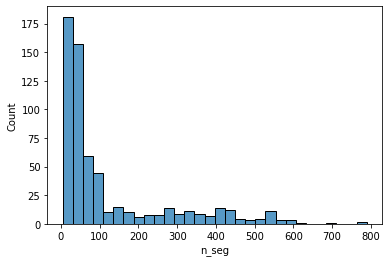

In [24]:
sns.histplot(x = 'n_seg', data = plt_df);

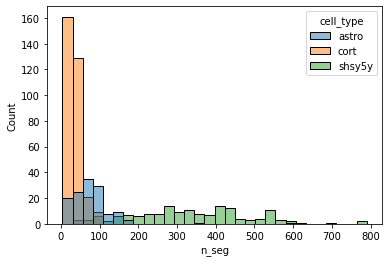

In [25]:
sns.histplot(x = 'n_seg', hue = 'cell_type', data = plt_df);

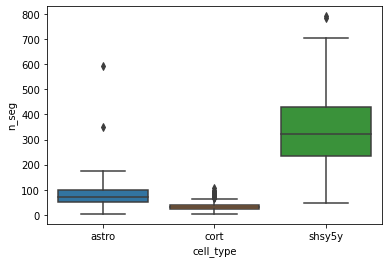

In [27]:
sns.boxplot(x = 'cell_type', y='n_seg', data = plt_df);

In [30]:
df.groupby('id')['cell_type'].value_counts(normalize=True).describe()

count    606.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: cell_type, dtype: float64

## Explorando as fotos

In [31]:
from fastai.vision.all import *

In [32]:
train_path = Path('/content/comp_data/train')

In [34]:
files = get_image_files(train_path)
files

(#606) [Path('/content/comp_data/train/a28407ce196e.png'),Path('/content/comp_data/train/41c57fe26957.png'),Path('/content/comp_data/train/9e8da786a80f.png'),Path('/content/comp_data/train/e9edcd9483e4.png'),Path('/content/comp_data/train/26efe388938c.png'),Path('/content/comp_data/train/c5be3066e673.png'),Path('/content/comp_data/train/194f7e69779b.png'),Path('/content/comp_data/train/c9d4c2430d92.png'),Path('/content/comp_data/train/18d5d665a6af.png'),Path('/content/comp_data/train/d75d5d14fdcb.png')...]

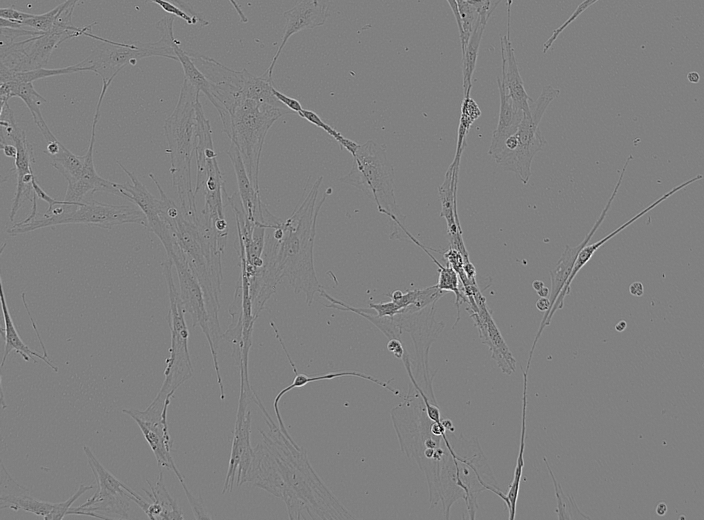

In [35]:
img = PILImageBW.create(files[0])
img

In [54]:
shape = img.shape

## Entendendo as máscaras 😷

In [37]:
mask = df.loc[0, 'annotation']
mask

'118145 6 118849 7 119553 8 120257 8 120961 9 121665 10 122369 12 123074 13 123778 14 124482 15 125186 16 125890 17 126594 18 127298 19 128002 20 128706 21 129410 22 130114 23 130818 24 131523 24 132227 25 132931 25 133635 24 134339 24 135043 23 135748 21 136452 19 137157 16 137864 11 138573 4'

In [39]:
s = mask.split()
L(s)

(#60) ['118145','6','118849','7','119553','8','120257','8','120961','9'...]

In [42]:
s[0], s[2], s[4], s[6]

('118145', '118849', '119553', '120257')

In [43]:
s[1], s[3], s[5], s[7]

('6', '7', '8', '8')

In [46]:
starts = np.array(s[0::2], dtype = 'int')
lenghts = np.array(s[1::2], dtype = 'int')

In [47]:
starts, lenghts

(array([118145, 118849, 119553, 120257, 120961, 121665, 122369, 123074,
        123778, 124482, 125186, 125890, 126594, 127298, 128002, 128706,
        129410, 130114, 130818, 131523, 132227, 132931, 133635, 134339,
        135043, 135748, 136452, 137157, 137864, 138573]),
 array([ 6,  7,  8,  8,  9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
        23, 24, 24, 25, 25, 24, 24, 23, 21, 19, 16, 11,  4]))

In [61]:
mask_decompressed = np.concatenate([np.arange(s, s + l + 1) for s, l in zip(starts, lenghts)])
mask_decompressed[:20]

array([118145, 118146, 118147, 118148, 118149, 118150, 118151, 118849,
       118850, 118851, 118852, 118853, 118854, 118855, 118856, 119553,
       119554, 119555, 119556, 119557])

In [58]:
msk_img = np.zeros((shape[0] * shape[1]))
msk_img[mask_decompressed] = 1
msk_img = msk_img.reshape(shape)

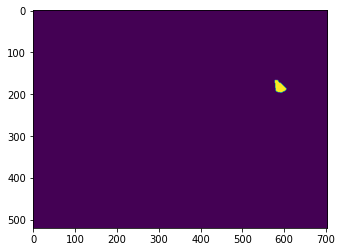

In [62]:
plt.imshow(msk_img);

## Transformando em uma função

In [65]:
def rle_decode(mask_rle, shape = (520, 704)):

    mask_splitted = mask_rle.split()

    starts = np.array(mask_splitted[0::2], dtype = 'int')
    lengths = np.array(mask_splitted[1::2], dtype = 'int')

    mask_decompressed = np.concatenate([np.arange(s, s + l + 1) for s, l in zip(starts, lengths)])

    msk_img = np.zeros((shape[0] * shape[1], 1), dtype = np.bool)
    msk_img[mask_decompressed] = 1
    
    return msk_img.reshape(shape)

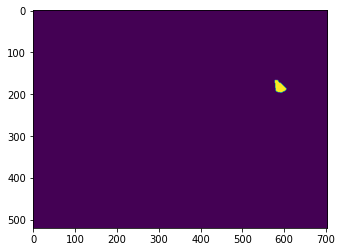

In [66]:
plt.imshow(rle_decode(mask));

### Aplicando para todas as máscaras de uma imagem

In [67]:
df = df.set_index('id')
df

,annotation,cell_type
id,,
0030fd0e6378,118145 6 118849 7 119553 8 120257 8 120961 9 121665 10 122369 12 123074 13 123778 14 124482 15 125186 16 125890 17 126594 18 127298 19 128002 20 128706 21 129410 22 130114 23 130818 24 131523 24 132227 25 132931 25 133635 24 134339 24 135043 23 135748 21 136452 19 137157 16 137864 11 138573 4,shsy5y
0030fd0e6378,189036 1 189739 3 190441 6 191144 7 191848 8 192552 9 193256 10 193960 11 194664 11 195368 12 196072 12 196776 13 197480 13 198185 13 198889 13 199593 14 200297 13 201002 11 201706 10 202410 9 203115 7 203819 6 204523 5 205227 5 205932 3 206636 2 207340 1,shsy5y
0030fd0e6378,173567 3 174270 5 174974 5 175678 6 176382 7 177085 9 177789 9 178493 10 179197 11 179901 12 180605 12 181308 14 182012 15 182716 15 183420 16 184125 16 184831 15 185536 14 186241 14 186947 12 187651 13 188356 12 189061 12 189767 10 190472 10 191177 9 191883 7 192589 5 193295 2 194000 1,shsy5y
0030fd0e6378,196723 4 197427 6 198130 7 198834 8 199538 8 200242 9 200946 9 201650 10 202354 10 203058 10 203762 11 204466 11 205170 12 205874 12 206578 13 207282 15 207986 16 208690 17 209394 18 210098 20 210802 21 211505 23 212208 24 212910 25 213613 25 214316 24 215018 24 215721 24 216426 21 217130 20 217835 17 218539 15 219243 13 219947 10 220652 7 221358 2,shsy5y
0030fd0e6378,167818 3 168522 5 169225 7 169928 8 170632 9 171336 9 172040 10 172743 12 173447 12 174151 13 174855 13 175558 18 176261 20 176965 21 177668 23 178372 22 179074 23 179776 24 180480 24 181184 22 181889 16 182594 10 183300 3,shsy5y
...,...,...
ffdb3cc02eef,3610 3 4311 7 5014 9 5717 11 6420 13 7123 15 7827 16 8531 16 9235 16 9939 16 10643 17 11347 17 12051 17 12756 16 13461 15 14165 14 14870 13 15575 11 16280 10 16986 7 17692 4 18398 1,cort
ffdb3cc02eef,341585 2 342287 5 342988 10 343690 13 344394 14 345097 16 345801 16 346505 16 347210 16 347914 16 348618 16 349323 14 350027 13 350731 12 351436 10 352140 10 352846 7 353552 4 354258 1,cort
ffdb3cc02eef,47788 3 48490 7 49192 11 49896 13 50599 14 51303 14 52007 13 52712 12 53416 12 54122 10 54828 6 55534 2,cort


In [109]:
df.loc['ffdb3cc02eef'].tail()

,annotation,cell_type
id,,
ffdb3cc02eef,3610 3 4311 7 5014 9 5717 11 6420 13 7123 15 7827 16 8531 16 9235 16 9939 16 10643 17 11347 17 12051 17 12756 16 13461 15 14165 14 14870 13 15575 11 16280 10 16986 7 17692 4 18398 1,cort
ffdb3cc02eef,341585 2 342287 5 342988 10 343690 13 344394 14 345097 16 345801 16 346505 16 347210 16 347914 16 348618 16 349323 14 350027 13 350731 12 351436 10 352140 10 352846 7 353552 4 354258 1,cort
ffdb3cc02eef,47788 3 48490 7 49192 11 49896 13 50599 14 51303 14 52007 13 52712 12 53416 12 54122 10 54828 6 55534 2,cort
ffdb3cc02eef,333290 1 333993 2 334696 4 335399 5 336102 6 336805 7 337509 8 338212 9 338916 9 339620 9 340324 9 341028 8 341732 8 342436 8 343140 8 343844 7 344548 7 345252 7 345956 7 346660 6 347364 6 348068 6 348772 6 349476 5 350180 5 350885 4 351589 3 352293 3 352997 2 353701 1,cort
ffdb3cc02eef,249775 2 250477 6 251180 8 251882 11 252585 12 253288 14 253992 14 254695 16 255398 17 256102 17 256805 17 257509 17 258212 17 258917 16 259621 15 260326 13 261031 11 261736 9 262442 6,cort


In [110]:
masks = df.loc['ffdb3cc02eef', 'annotation'].values
masks[:3]

array(['96707 4 97406 10 98110 11 98814 11 99517 12 100221 12 100925 13 101629 13 102333 13 103038 12 103742 12 104447 10 105152 9 105857 7',
       '352280 2 352983 5 353687 7 354390 9 355094 10 355797 12 356501 12 357204 14 357909 14 358615 11 359321 7',
       '279780 4 280481 9 281184 11 281888 11 282591 13 283295 14 283998 16 284702 16 285407 16 286112 15 286816 15 287521 14 288226 12 288931 11 289635 11 290340 10 291045 8 291750 7 292455 5 293159 4 293864 3 294569 1'],
      dtype=object)

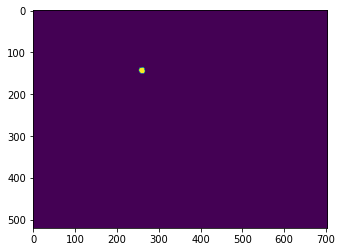

In [111]:
plt.imshow(rle_decode(masks[0]));

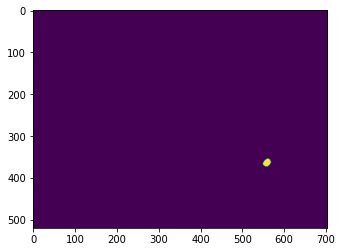

In [112]:
plt.imshow(rle_decode(masks[-1]));

In [113]:
mask_imgs = [rle_decode(m) for m in masks]
len(mask_imgs)

77

In [114]:
mask_img = np.stack(mask_imgs)
mask_img.shape

(77, 520, 704)

In [115]:
mask_img = mask_img.sum(axis = 0)
mask_img.shape

(520, 704)

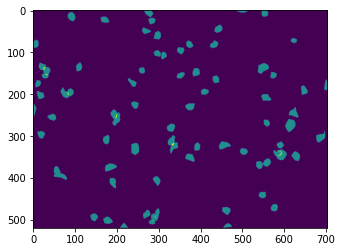

In [116]:
plt.imshow(mask_img);

In [117]:
mask_img.min(), mask_img.max()

(0, 2)

In [118]:
mask_img = mask_img.astype(np.bool)

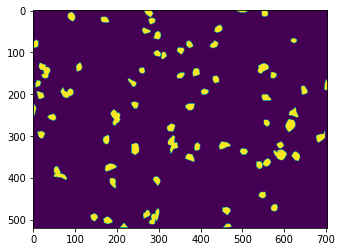

In [119]:
plt.imshow(mask_img);

## Comparando com a foto

In [123]:
file = train_path / ('ffdb3cc02eef' + '.png')

In [124]:
img = PILImageBW.create(file)

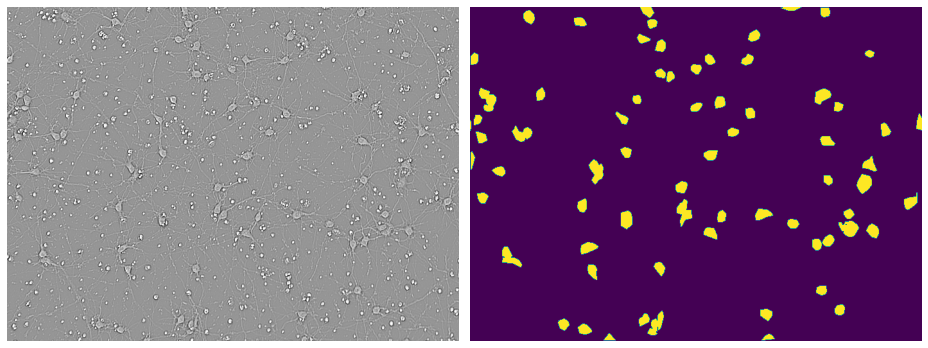

In [125]:
fig, ax = plt.subplots(1,2,figsize=(13, 6))
ax[0].imshow(np.array(img), cmap = 'Greys')
ax[0].axis("off")
ax[1].imshow(mask_img)
ax[1].axis("off")
plt.tight_layout();